# Modelagem e simualção Projeto 3

Para a realização do projeto 3, escolhemos modelar um sistema mecanico, no qual simulará uma pessoa pulando de bungee jump

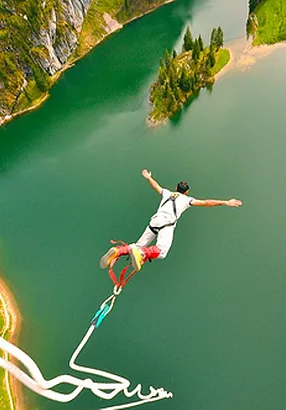

<hr>

<h2>Perguntas a serem respondidas</h2>

<ul>
    <li>Como seria o mesmo salto em diferentes gravidades</li>
    <li>Como seria o mesmo salto com diferentes massas </li>
<ul>

<hr>

<h2>Equações</h2>

<img src='imgs/formula.png'>


<hr>

<h2>Glossário</h2>

In [27]:
M= 75 #kg
G= 9.8 #m/s²
c= 1  #admencional
A= 0.9 #m²
K= 10 #N/m0 
C=12  #N*s/m
L0 = 50 #m

<hr>

<h2>Código</h2>

<h4>Bibliotecas</h4>

In [28]:
from math import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np


In [29]:
def Modelo(X,T):
    y = X[0]
    vy = X[1]
    
    P = M*G
    D = (c * A* vy*abs(vy))/2
    if y >= L0: #Elástico tensionado
        Fel = K * (y - L0)
        Fam = C * vy
    else: #Elástico não tensionado
        Fel = 0
        Fam = 0
    
    dydt = vy
    dvydt = (P - D  - Fel - Fam) / M
    
    return [dydt, dvydt]

In [30]:
y0 = 0
vy0 = 0
x_0 = [y0,vy0] #Condições iniciais

tempo = np.arange(0,2*60,0.1)

solucao = odeint(Modelo,x_0,tempo)
y = solucao[:,0]
vy = solucao[:,1]

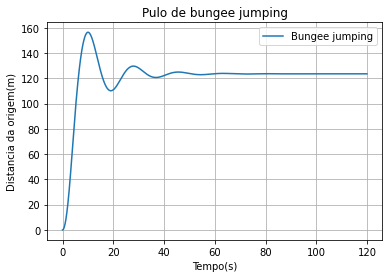

In [31]:
plt.plot(tempo, y, label = 'Bungee jumping')
plt.xlabel('Tempo(s)')
plt.ylabel('Distancia da origem(m)')
plt.title('Pulo de bungee jumping')
plt.legend()
plt.grid()
plt.show()

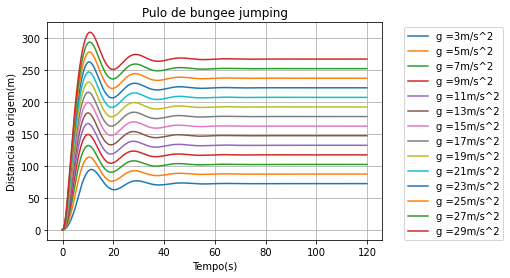

In [32]:
#Diferentes gravidades
legendas = []
g = np.arange(3, 30, 2)

for G in g:
    solucao = odeint(Modelo,x_0,tempo)
    y = solucao[:,0]
    vy = solucao[:,1]
    plt.plot(tempo, y)
    legendas.append('g ='+ str(G)+'m/s^2')
    
    
plt.xlabel('Tempo(s)')
plt.ylabel('Distancia da origem(m)')
plt.title('Pulo de bungee jumping')
plt.legend(legendas, bbox_to_anchor = (1.05, 1))
plt.grid()
plt.show()

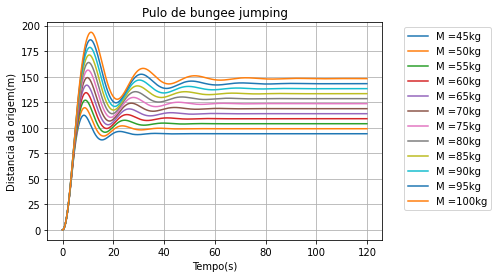

In [33]:
m = np.arange(45, 101, 5)
G = 9.81
legendas = []
#Diferentes massas

for M in m:
    solucao = odeint(Modelo,x_0,tempo)
    y = solucao[:,0]
    vy = solucao[:,1]
    plt.plot(tempo, y)
    legendas.append('M ='+ str(M)+ 'kg')
    
plt.xlabel('Tempo(s)')
plt.ylabel('Distancia da origem(m)')
plt.title('Pulo de bungee jumping')
plt.legend(legendas, bbox_to_anchor = (1.05, 1))
plt.grid()
plt.show()